In [1]:
import pandas as pd
import numpy as np

import jointpmf as jp

import matplotlib.pyplot as plt

c:\Users\rquax1\Repositories\jointpmf_package\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
numvalues = 3
max_evals_srv = 100

# Redundant collider

In [3]:
# when a dependent variable is added that is supposed to correlate with a previously existing
# variable, the target MI will be this fraction of the entropy of the previously existing
# variable.
redundant_mi_target_frac = 0.8

In [4]:
bn_red = jp.BayesianNetwork()

# independent variables to start with (root(s) of the DAG)
bn_red.append_independent_variable('uniform', numvalues)
# add a variable which depends on ONE variable
bn_red.append_dependent_variable([0], numvalues, bn_red.entropy([0]) * redundant_mi_target_frac)
bn_red.append_dependent_variable([0], numvalues, bn_red.entropy([0]) * redundant_mi_target_frac)

# output:
bn_red.append_dependent_variable([1, 2], numvalues, bn_red.entropy([1, 2]) * redundant_mi_target_frac)

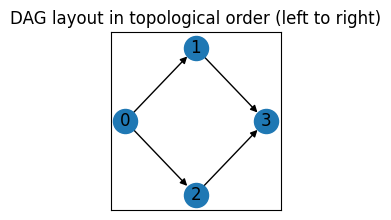

In [5]:
bn_red.draw_graph(figsize=(2, 2.3));

Note that the above graph is a collider graph ({1, 2} --> 3) but with a (latent) confounder (0) to create a correlation (redundancy) between the inputs.

In [6]:
bn_red.o_information([1, 2, 3])  # positive values indicate redundancy

0.4827015426410961

In [7]:
bn_red.wms([1,2], [3])  # negative values indicate redundancy

-0.4827015426410963

# Synergistic collider

In [8]:
bn_syn = jp.BayesianNetwork()

# independent variables to start with (input 0)
bn_syn.append_independent_variable('uniform', numvalues)
# independent variables to start with (input 1)
bn_syn.append_independent_variable('uniform', numvalues)

# output:
bn_syn.append_synergistic_variable([0, 1], numvalues, max_evals=max_evals_srv)

In [9]:
bn_syn.o_information([0, 1, 2])  # negative values indicate synergy

-0.9071646287004627

In [10]:
bn_syn.wms([0,1], [2])  # positive values indicate synergy

0.9071646287004627

# Independent collider

In [11]:
bn_ind = jp.BayesianNetwork()

# independent variables to start with (input 0)
bn_ind.append_independent_variable('uniform', numvalues)
# independent variables to start with (input 1)
bn_ind.append_independent_variable('uniform', numvalues)

# output:
bn_ind.append_independent_variable('uniform', numvalues)

2

In [12]:
bn_ind.o_information([0, 1, 2])  # negative values indicate synergy

0.0

In [13]:
bn_ind.wms([0,1], [2])  # positive values indicate synergy

4.440892098500626e-16

# Generating continuous data from these discrete toy models

In [25]:
num_samples_hist = 500
sigma_cont_data = 0.5  # standard deviation of the normally distributed noise that is added to the discrete samples to make them continuous

In [14]:
discr_data = bn_red.generate_samples(5)

discr_data

array([[2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 1, 2]], dtype=int8)

In [15]:
cont_data = bn_red.generate_continuous_samples(5)

cont_data

array([[-0.01510759,  0.9933362 , -0.00433335,  0.53867032],
       [-0.26206304,  0.306531  , -0.38975407,  0.86145025],
       [ 1.35590628,  1.82194206,  3.0718244 , -0.65774228],
       [ 1.28296898,  1.91266229,  2.57212477,  0.14792131],
       [ 2.51105433,  1.31524356,  1.6327512 ,  1.50124014]])

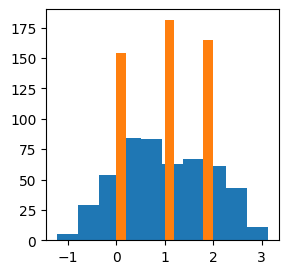

In [26]:
# make a histogram of the first variable's data, just as example
plt.figure(figsize=(3, 3))
plt.hist(bn_red.generate_continuous_samples(num_samples_hist, sigma=sigma_cont_data)[:,0])
plt.hist(bn_red.generate_samples(num_samples_hist)[:,0])
plt.show()

## Generate a continuous data set for each collider

In [28]:
num_samples_cont_data = 10000

In [29]:
cont_data_red = bn_red.generate_continuous_samples(num_samples_cont_data, sigma=sigma_cont_data)
cont_data_red = cont_data_red[:,[1,2,3]]  # remove the (latent) confounder (variable 0) which was just there to create correlation between the inputs
cont_data_syn = bn_syn.generate_continuous_samples(num_samples_cont_data, sigma=sigma_cont_data)
cont_data_ind = bn_ind.generate_continuous_samples(num_samples_cont_data, sigma=sigma_cont_data)

TODO: compute O-info and WMS for the continuous data sets